# CA2 Deep Learning Assignment [GAN] [Part A]

- Name: Jaysoorya Rajendran / Tay Yikoon Lomibao
- Admin Number: P2309024 / P2309389
- Class: DAAA/FT/2A/01

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
import os
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose
from tensorflow.keras.layers import BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import os
import matplotlib.pyplot as plt  

In [106]:
data = pd.read_csv('emnist-letters-train.csv')

In [107]:
data

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99034,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99035,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99036,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99037,-1,174,174,174,174,174,174,174,174,174,...,174,174,174,174,174,174,174,174,174,174


In [108]:
data.shape

(99039, 785)

In [109]:
# Filter out rows where the first column (labels) has a value of -1
data_without_blank = data[data.iloc[:, 0] != -1]

# Extract labels and image pixel values
labels = data_without_blank.iloc[:, 0].values  # First column as labels
images = data_without_blank.iloc[:, 1:].values  # Rest of the columns as image pixel values

# Get the number of images and pixels
num_images = images.shape[0]
num_pixels = images.shape[1]

# Assuming square images
image_size = int(np.sqrt(num_pixels))

# Reshape the images to 2D
images = images.reshape(num_images, image_size, image_size)

print("Shape of labels:", labels.shape)
print("Shape of images:", images.shape)
print("Size of Images:", image_size, "x", image_size, "pixels")

Shape of labels: (88799,)
Shape of images: (88799, 28, 28)
Size of Images: 28 x 28 pixels


# Standardization and Normalization

In [110]:
from tensorflow.keras.layers import Normalization

# Changing it to -1 to 1
images = images/255.0

# Normalizing the images
# preprocessing_v1 = Normalization()
# preprocessing_v1.adapt(images)
# images = preprocessing_v1(images)

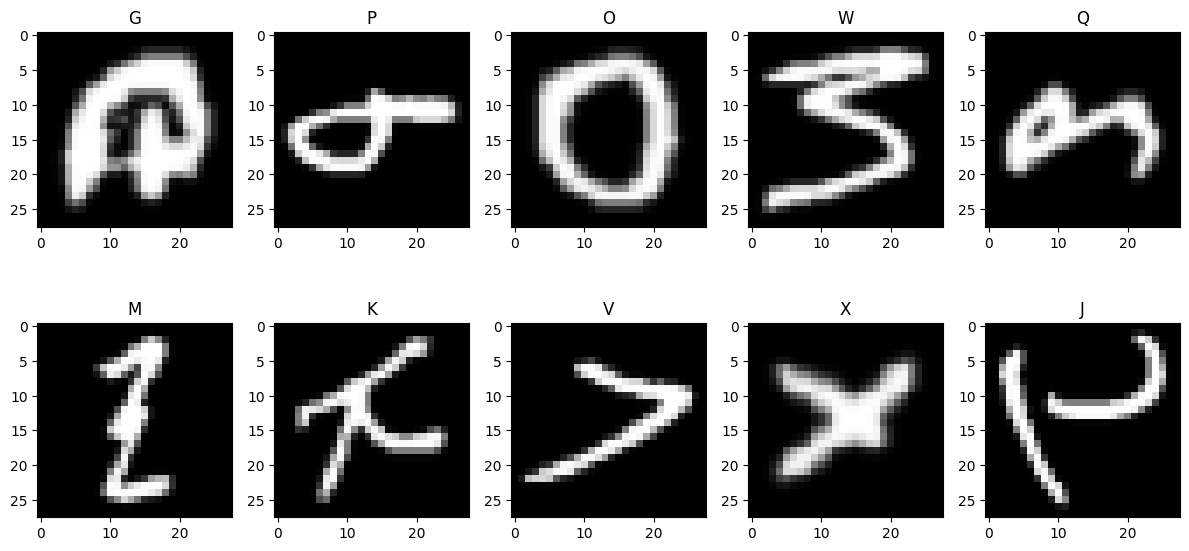

In [111]:
# EMNIST labels are 1-indexed, with '1' corresponding to 'A', '2' to 'B', ..., '26' to 'Z'
label_to_letter = {i: chr(ord('A') + i - 1) for i in range(1, 27)}

# Display the first 10 images with grids, axis labels, and class labels
num_plot = 10
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    if i < num_plot:
        ax.imshow(images[i], cmap='gray')
        label = label_to_letter[labels[i]]
        ax.set_title(f'{label}', fontsize=12)  # Add title with class label

plt.tight_layout()
plt.show()


In [112]:
# Flip the images horizontally so that they are right-side up
images = np.array([np.rot90(np.flipud(img), k=3) for img in images])

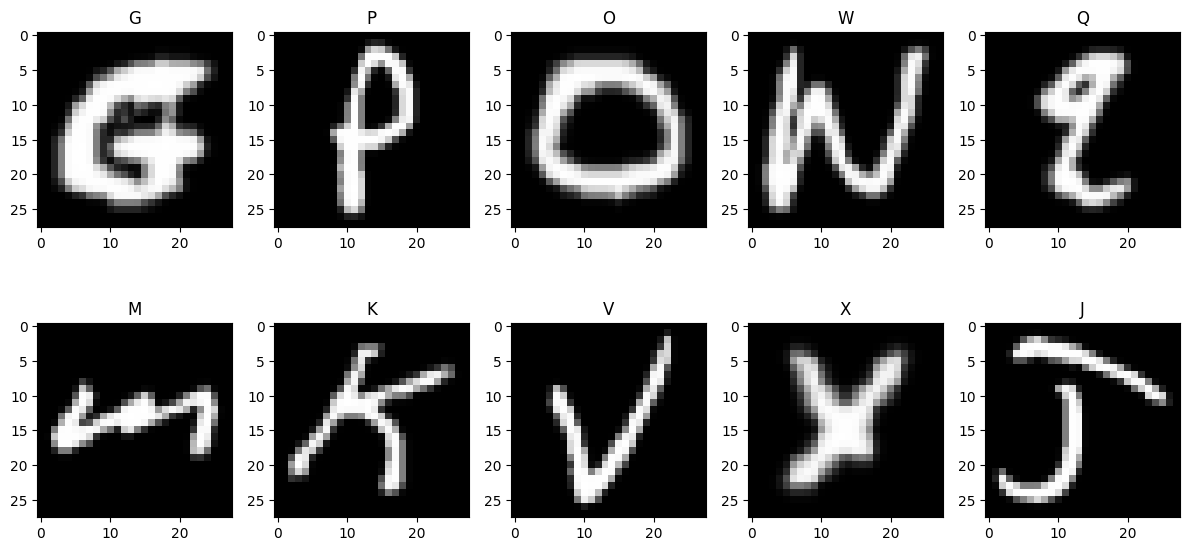

In [113]:
# EMNIST labels are 1-indexed, with '1' corresponding to 'A', '2' to 'B', ..., '26' to 'Z'
label_to_letter = {i: chr(ord('A') + i - 1) for i in range(1, 27)}

# Display the first 10 images with grids, axis labels, and class labels
num_plot = 10
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    if i < num_plot:
        ax.imshow(images[i], cmap='gray')
        label = label_to_letter[labels[i]]
        ax.set_title(f'{label}', fontsize=12)  # Add title with class label

plt.tight_layout()
plt.show()

# Class Weights

In [114]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming labels contains the labels from 1 to 26 for A to Z
# and images contains the corresponding images

# Map numerical labels to corresponding letters
label_to_letter = {i: chr(ord('A') + i - 1) for i in range(1, 27)}

# Initialize list to store the number of images per class
num_images_per_class = []

# Loop through each class index and count the number of images
for class_idx in range(1, 27):
    class_images = images[labels == class_idx]
    num_images_per_class.append(len(class_images))
    print(f"{label_to_letter[class_idx]}: {len(class_images)} images")

print("\nNumber of images per class:", num_images_per_class)



A: 3396 images
B: 3396 images
C: 3419 images
D: 3398 images
E: 3437 images
F: 3394 images
G: 3385 images
H: 3424 images
I: 3428 images
J: 3402 images
K: 3438 images
L: 3415 images
M: 3402 images
N: 3365 images
O: 3408 images
P: 3430 images
Q: 3435 images
R: 3419 images
S: 3392 images
T: 3436 images
U: 3419 images
V: 3422 images
W: 3422 images
X: 3437 images
Y: 3453 images
Z: 3427 images

Number of images per class: [3396, 3396, 3419, 3398, 3437, 3394, 3385, 3424, 3428, 3402, 3438, 3415, 3402, 3365, 3408, 3430, 3435, 3419, 3392, 3436, 3419, 3422, 3422, 3437, 3453, 3427]


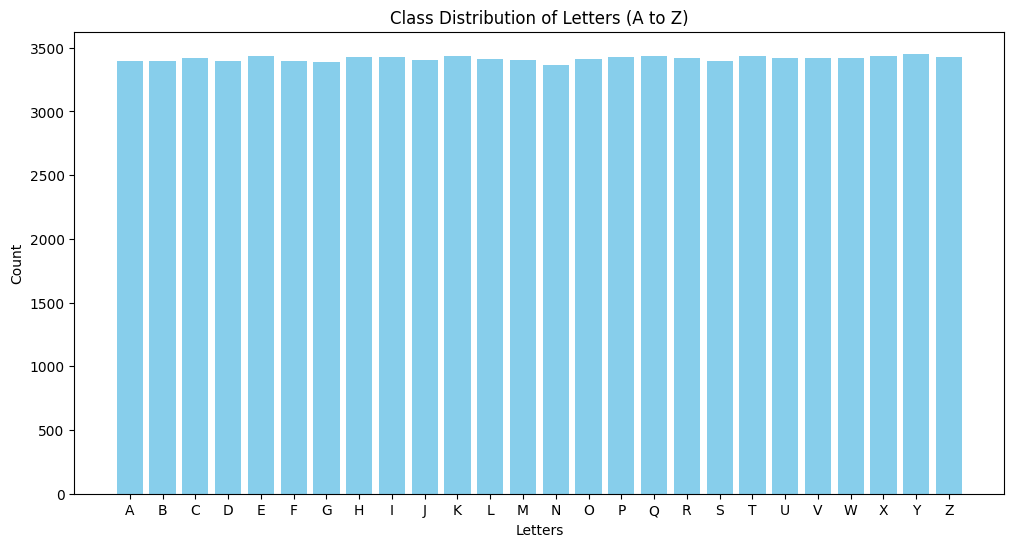

In [115]:
# Plotting the class distribution
letters = [label_to_letter[i] for i in range(1, 27)]
plt.figure(figsize=(12, 6))
plt.bar(letters, num_images_per_class, color='skyblue')
plt.xlabel('Letters')
plt.ylabel('Count')
plt.title('Class Distribution of Letters (A to Z)')
plt.show()

# Image Averaging

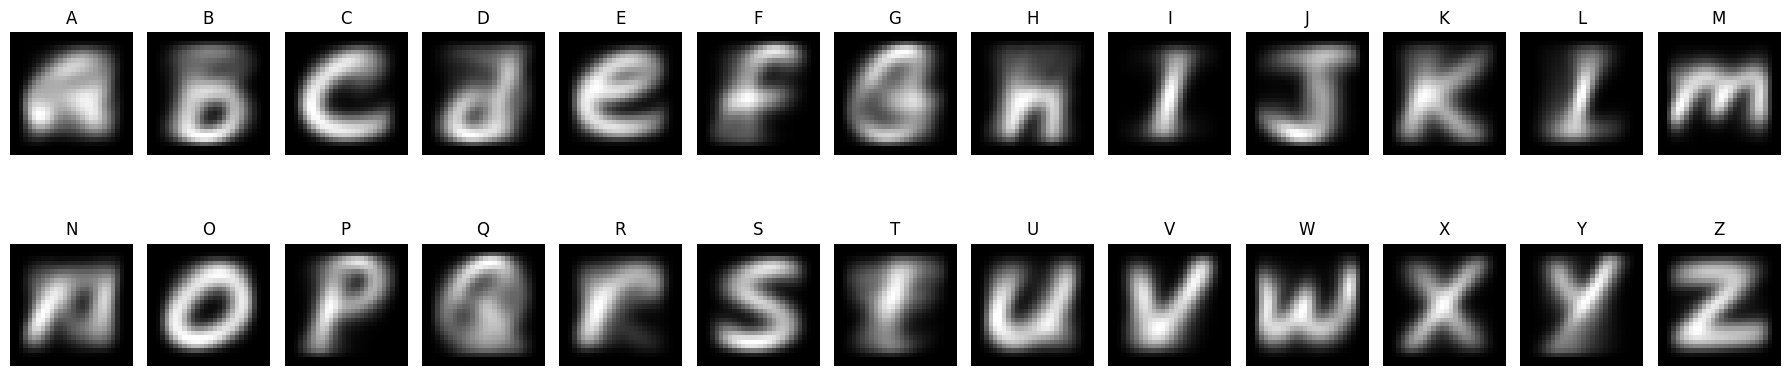

In [116]:
# Assuming images and labels are already defined

# EMNIST labels are 1-indexed, with '1' corresponding to 'A', '2' to 'B', ..., '26' to 'Z'
label_to_letter = {i: chr(ord('A') + i - 1) for i in range(1, 27)}

# Get the number of images and pixels
num_images = images.shape[0]
image_size = images.shape[1]

# Initialize a dictionary to hold the sum of images and count for each label
image_sums = {letter: np.zeros((image_size, image_size), dtype=np.float32) for letter in label_to_letter.values()}
image_counts = {letter: 0 for letter in label_to_letter.values()}

# Sum the images for each label
for img, label in zip(images, labels):
    if label in label_to_letter:
        letter = label_to_letter[label]
        image_sums[letter] += img
        image_counts[letter] += 1
    else:
        print(f"Unexpected label {label} encountered. Skipping this entry.")

# Calculate the average images
average_images = {letter: image_sums[letter] / image_counts[letter] for letter in image_sums.keys()}

# Display the average images
fig, axes = plt.subplots(2, 13, figsize=(18, 5))

for i, (letter, avg_img) in enumerate(average_images.items()):
    ax = axes.flat[i]
    ax.imshow(avg_img, cmap='gray', interpolation='nearest')  # 'nearest' to avoid blurring
    ax.set_title(f'{letter}')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Reshaping the labels

In [117]:
labels = labels.astype(np.int32).reshape(-1, 1)

# Check the data type of the labels
print(f"The data type of labels is: {labels.dtype}")
print(f"The shape of labels is: {labels.shape}")

The data type of labels is: int32
The shape of labels is: (88799, 1)


# Checking 1st Image

In [118]:
first_image = images[0]
first_label = labels[0]
# Check the shape of the first image
if len(first_image.shape) == 2:
    height, width = first_image.shape
    channels = 1  # Grayscale image has 1 channel
    print(f"Height: {height}, Width: {width}, Channels: {channels}")
elif len(first_image.shape) == 3:
    height, width, channels = first_image.shape
    print(f"Height: {height}, Width: {width}, Channels: {channels}")
else:
    print("Unexpected image shape:", first_image.shape)

print("Image Shape:", first_image.shape)
print("Label:", first_label.shape)

Height: 28, Width: 28, Channels: 1
Image Shape: (28, 28)
Label: (1,)


# Data Augmentation

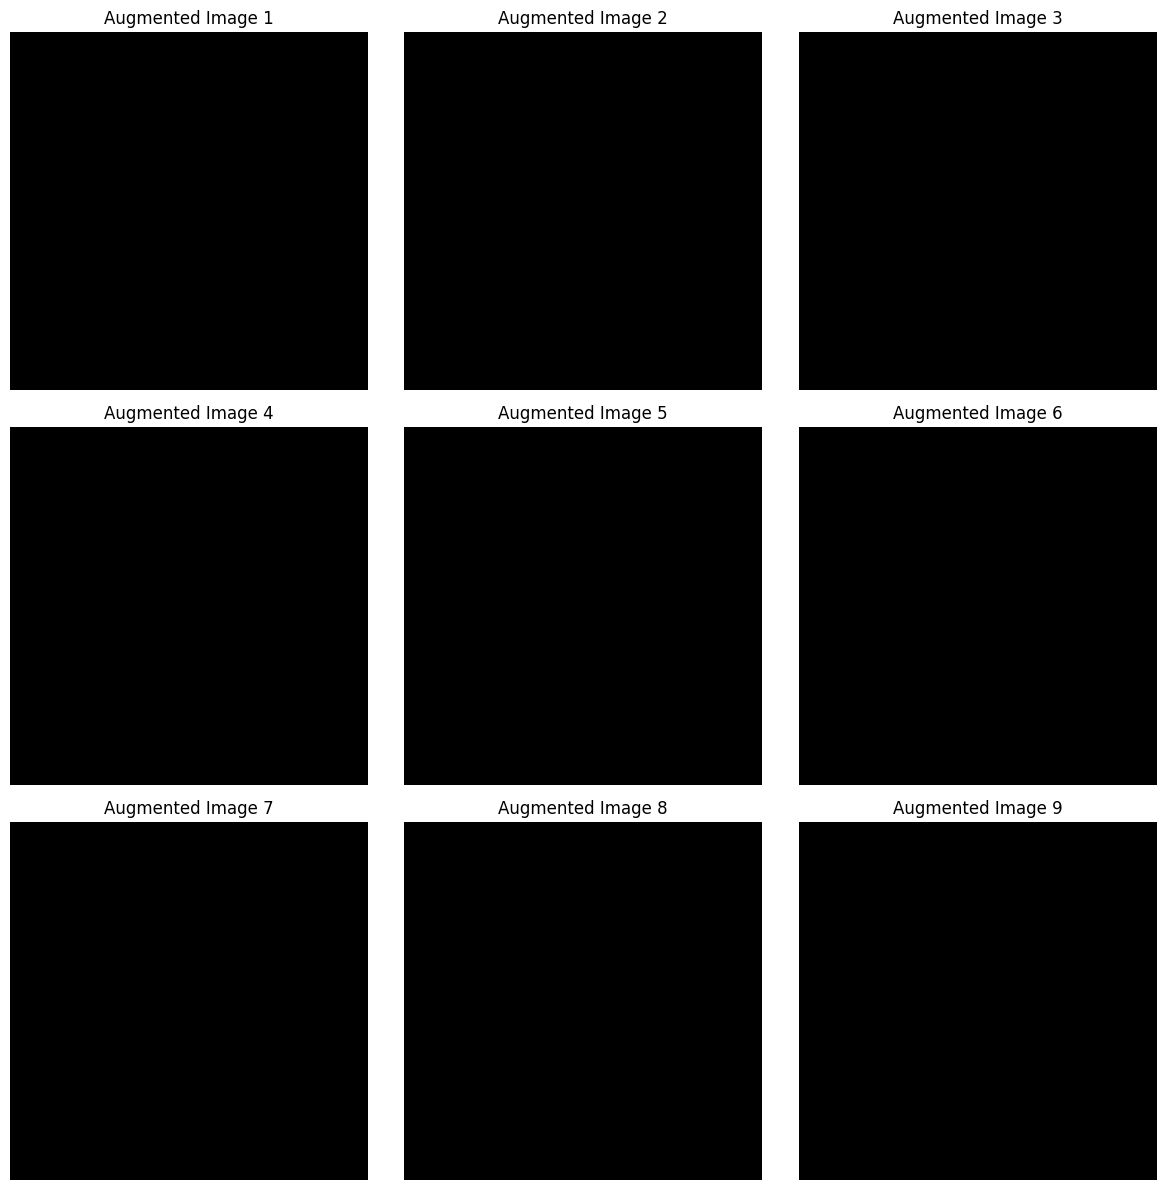

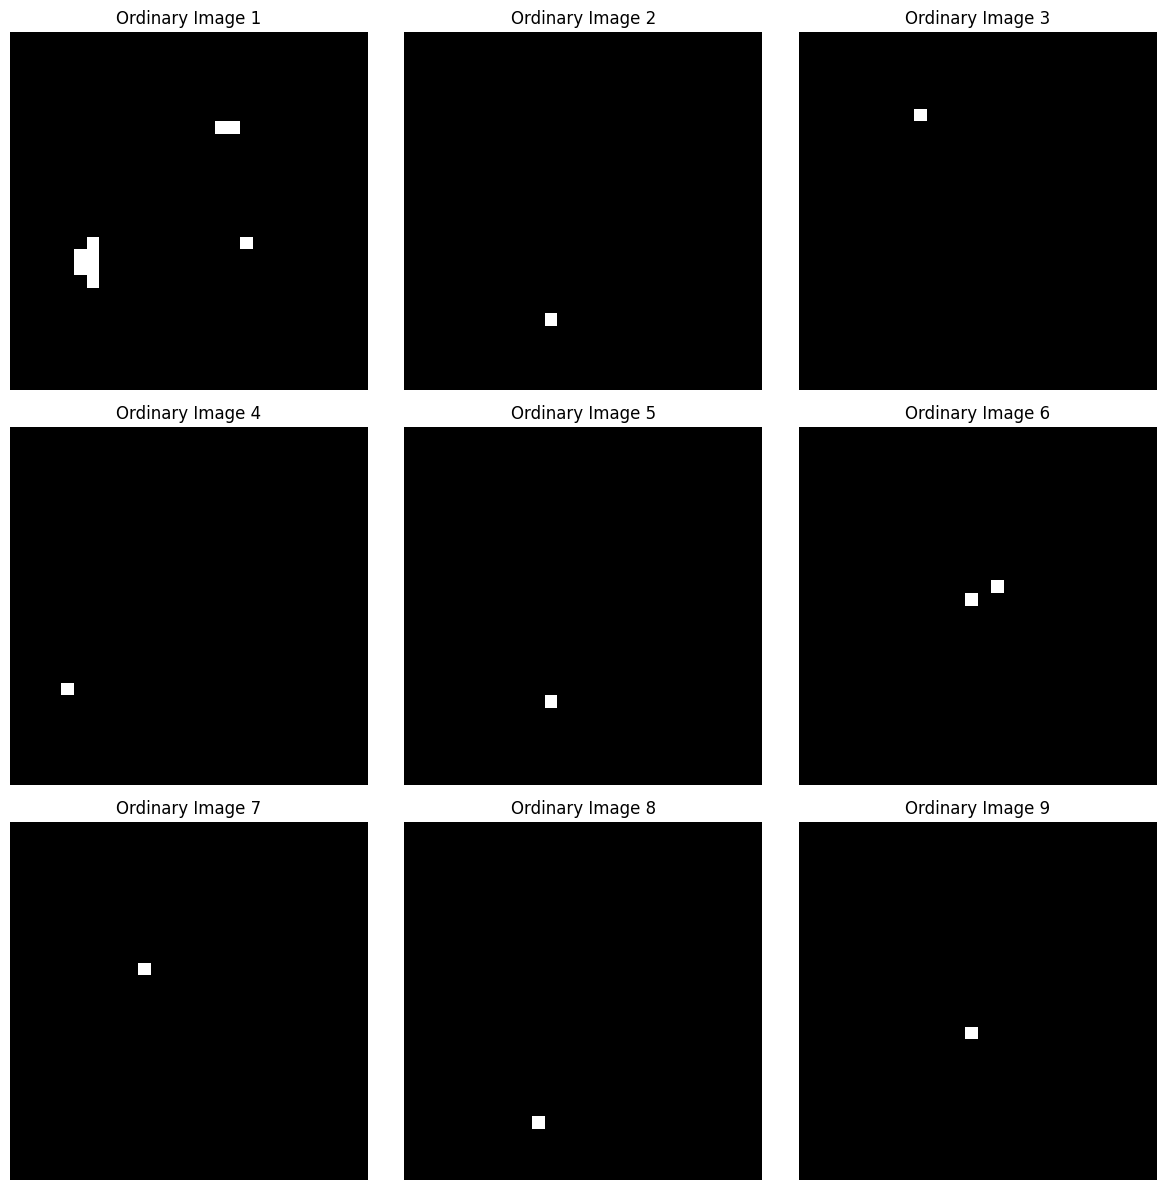

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming 'images' is your image dataset and 'labels' are corresponding labels
images = np.expand_dims(images, axis=-1)  # Expand dimensions to include channel (if not already)

# Initialize the ImageDataGenerator with the desired augmentations
datagen = ImageDataGenerator(
    width_shift_range=0.1,    # Horizontal shift up to 10% of image width
    height_shift_range=0.1,   # Vertical shift up to 10% of image height
    zoom_range=0.1,           # Zoom up to 10%
)

# Generate augmented images
image_generator = datagen.flow(images, batch_size=len(images), shuffle=True)
images_aug = next(image_generator)

# Double the labels to match the augmented images
labels = np.concatenate((labels, labels), axis=0)

# Concatenate the original images with the augmented images
images = np.concatenate((images, images_aug), axis=0)

# Visualize some of the augmented images
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_aug[i].astype(np.uint8), cmap='gray')  # Display in grayscale
    plt.axis('off')
    plt.title(f'Augmented Image {i+1}', fontsize=12)  # Add title for each subplot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# visualize some of the combined images
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].astype(np.uint8), cmap='gray')  # Display in grayscale
    plt.axis('off')
    plt.title(f'Ordinary Image {i+1}', fontsize=12)  # Add title for each subplot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()



## New Shape

In [120]:
print("Shape of images:", images.shape)
print("Shape of labels:", labels.shape)

print("\n-----------------------------\n")

print("Number of Dimensions of Images:", images.ndim)
print("Number of Dimensions of Labels:", labels.ndim)

print("\n-----------------------------\n")

print("Data Type of Images:", images.dtype)
print("Data Type of Labels:", labels.dtype)

Shape of images: (177598, 28, 28, 1)
Shape of labels: (177598, 1)

-----------------------------

Number of Dimensions of Images: 4
Number of Dimensions of Labels: 2

-----------------------------

Data Type of Images: float64
Data Type of Labels: int32


## EarlyStopping Callback (?)

In [121]:
import tensorflow as tf
print(tf.__version__)

2.10.0


# CGAN (Conditional GAN) ( Training based on labelling )

In [122]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Embedding, multiply, LeakyReLU, BatchNormalization, Activation
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, ZeroPadding2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

In [123]:
'''
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Embedding, multiply, LeakyReLU, BatchNormalization
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import wasserstein_loss
from tensorflow.keras.layers import SpectralNormalization

class CGAN:
  def __init__(self, img_shape, num_classes, latent_dim=100):
    self.img_shape = img_shape
    self.num_classes = num_classes
    self.latent_dim = latent_dim
    self.generator = self.build_generator()
    self.discriminator = self.build_discriminator()
    self.cgan = self.build_cgan()
    self.cgan.compile(loss=wasserstein_loss, optimizer=Adam(0.0002, 0.5))
    self.discriminator.compile(loss=wasserstein_loss, optimizer=Adam(0.0002, 0.5))

  def build_generator(self):
    model = Sequential()
    model.add(Dense(256, input_dim=self.latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dropout(0.3))  # Add dropout for overfitting prevention

    # Add more convolutional layers for complex features
    model.add(Conv2D(512, kernel_size=3, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dropout(0.3))

    model.add(Conv2DTranspose(1024, kernel_size=3, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))

    model.add(Conv2DTranspose(self.img_shape[2], kernel_size=3, padding='same'))
    model.add(Activation('tanh'))  # Use activation for image data

    # noise = Input(shape=(self.latent_dim,))  ThIS PART GOT ERROR  { Just use this code if it really doesnt work: noise = Input(shape=(self.latent_dim,)) img = model(noise)}}
    # label = Input(shape=(1,))
    # label_embedding = Embedding(self.num_classes, latent_dim=100)(label)
    # combined_noise = multiply([noise, label_embedding])  # Concatenate with embedding
    # img = model(combined_noise)

    return Model([noise, label], img)

  def build_discriminator(self):
    model = Sequential()
    model.add(Flatten(input_shape=self.img_shape))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))  # Add dropout

    # Add more convolutional layers for complex features
    model.add(Conv2D(256, kernel_size=3, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(SpectralNormalization())  # Add spectral normalization

    model.add(Dense(1))
    img = Input(shape=self.img_shape)
    validity = model(img)

    return Model(img, validity)

  def build_cgan(self):
    noise = Input(shape=(self.latent_dim,))
    label = Input(shape=(1,))
    img = self.generator([noise, label])
    self.discriminator.trainable = False
    validity = self.discriminator(img)

    return Model([noise, label], validity)

  def train(self, images, labels, epochs=10000, batch_size=256, save_interval=500):
    os.makedirs('CGAN_Generated_Images', exist_ok=True)
    X_train = images
    y_train = labels - 1

    def gradient_penalty(epochs, batch_size):
      alpha = np.random.rand(batch_size, 1, 1, 1)
      interpolated = alpha * X_train + (1 - alpha) * gen_imgs
      valid = np.ones((batch_size, 1))
      fake = np.zeros((batch_size, 1))
      _, d_loss_interp = self.discriminator.train_on_batch(interpolated, valid)
      gradients = self.discriminator.trainable_variables
      grad_penalty = np.mean([tf.reduce_sum((tf.square(tf.gradients(d_loss_interp, i)[0]))) for i in gradients])
      return grad_penalty
    
    # Learning rate scheduling (optional)
    def get_learning_rate(epoch, learning_rate_start, learning_rate_decay):
      return learning_rate_start * np.exp(-learning_rate_decay * epoch)

    for epoch in range(epochs):
      # Train Discriminator
      idx = np.random.randint(0, X_train.shape[0], batch_size)
      imgs = X_train[idx]
      labels_real = y_train[idx]
      noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
      gen_labels = np.random.randint(0, self.num_classes, (batch_size, 1))
      gen_imgs = self.generator.predict([noise, gen_labels])
      real = np.ones((batch_size, 1))
      fake = np.zeros((batch_size, 1))

      d_loss_real = self.discriminator.train_on_batch(imgs, real)
      d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
      d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

      # Gradient penalty
      lambda_penalty = 10  # Weight for the gradient penalty
      gp = gradient_penalty(epoch, batch_size)
      d_loss += lambda_penalty * gp

      # Train Generator
      noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
      gen_labels = np.random.randint(0, self.num_classes, (batch_size, 1))
      valid_y = np.ones((batch_size, 1))
      g_loss = self.cgan.train_on_batch([noise, gen_labels], valid_y)

      # Learning rate scheduling (optional)
      # learning_rate = get_learning_rate(epoch, 0.0002, 0.00001)  # Example learning rate decay
      # self.discriminator.optimizer.learning_rate.assign(learning_rate)
      # self.cgan.optimizer.learning_rate.assign(learning_rate)

      # Print the progress
      print(f"{epoch + 1}/{epochs} [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]}%] [G loss: {g_loss}]")

      # Save generated images at save intervals
      if (epoch + 1) % save_interval == 0:
        self.save_images(epoch + 1)

  def save_images(self, epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, self.latent_dim))
    gen_labels = np.random.randint(0, self.num_classes, (r * c, 1))
    gen_imgs = self.generator.predict([noise, gen_labels])
    gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale to [0, 1]

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
      for j in range(c):
        axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
        axs[i, j].axis('off')
        cnt += 1
    fig.savefig(f"CGAN_Generated_Images/cgan_{epoch}.png")
    plt.close()
    
'''


'\nimport os\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Embedding, multiply, LeakyReLU, BatchNormalization\nfrom tensorflow.keras.layers import Conv2D, Conv2DTranspose\nfrom tensorflow.keras.models import Sequential, Model\nfrom tensorflow.keras.optimizers import Adam\nfrom tensorflow.keras.losses import wasserstein_loss\nfrom tensorflow.keras.layers import SpectralNormalization\n\nclass CGAN:\n  def __init__(self, img_shape, num_classes, latent_dim=100):\n    self.img_shape = img_shape\n    self.num_classes = num_classes\n    self.latent_dim = latent_dim\n    self.generator = self.build_generator()\n    self.discriminator = self.build_discriminator()\n    self.cgan = self.build_cgan()\n    self.cgan.compile(loss=wasserstein_loss, optimizer=Adam(0.0002, 0.5))\n    self.discriminator.compile(loss=wasserstein_loss, optimizer=Adam(0.0002, 0.5))\n\n  def build_generator(self):\n    model = Sequential()\n    mode

# CGAN (Conditional GAN) ( Training based on labelling )

## Running the CGAN Model

In [124]:
'''
# Create a CGAN instance
cgan = CGAN(img_shape=(28, 28, 1), num_classes=26, latent_dim=100)

# Train the CGAN
cgan.train(images, labels, epochs=10000, batch_size=256, save_interval=500)
'''

'\n# Create a CGAN instance\ncgan = CGAN(img_shape=(28, 28, 1), num_classes=26, latent_dim=100)\n\n# Train the CGAN\ncgan.train(images, labels, epochs=10000, batch_size=256, save_interval=500)\n'

# SAGAN (Self-Attention GAN)

In [125]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, Conv2D, Conv2DTranspose, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.layers import UpSampling2D, Layer, Add, Multiply
from tensorflow.keras.models import Sequential, Model
from keras.layers import ZeroPadding2D
from tensorflow.keras.optimizers import Adam

## Self-Attention Layer

In [126]:
'''
class SelfAttention(Layer):
    def __init__(self, channels):
        super(SelfAttention, self).__init__()
        self.channels = channels
        self.query_conv = Conv2D(channels // 8, kernel_size=1)
        self.key_conv = Conv2D(channels // 8, kernel_size=1)
        self.value_conv = Conv2D(channels, kernel_size=1)
        self.gamma = tf.Variable(initial_value=0.0, trainable=True)

    def call(self, inputs):
        batch_size, height, width, num_channels = inputs.get_shape().as_list()

        query = self.query_conv(inputs)
        key = self.key_conv(inputs)
        value = self.value_conv(inputs)

        query = tf.reshape(query, (batch_size, -1, height * width))
        key = tf.reshape(key, (batch_size, -1, height * width))
        value = tf.reshape(value, (batch_size, -1, height * width))

        attention = tf.matmul(query, key, transpose_b=True)
        attention = tf.nn.softmax(attention)

        out = tf.matmul(attention, value)
        out = tf.reshape(out, (batch_size, height, width, num_channels))

        return self.gamma * out + inputs
'''


'\nclass SelfAttention(Layer):\n    def __init__(self, channels):\n        super(SelfAttention, self).__init__()\n        self.channels = channels\n        self.query_conv = Conv2D(channels // 8, kernel_size=1)\n        self.key_conv = Conv2D(channels // 8, kernel_size=1)\n        self.value_conv = Conv2D(channels, kernel_size=1)\n        self.gamma = tf.Variable(initial_value=0.0, trainable=True)\n\n    def call(self, inputs):\n        batch_size, height, width, num_channels = inputs.get_shape().as_list()\n\n        query = self.query_conv(inputs)\n        key = self.key_conv(inputs)\n        value = self.value_conv(inputs)\n\n        query = tf.reshape(query, (batch_size, -1, height * width))\n        key = tf.reshape(key, (batch_size, -1, height * width))\n        value = tf.reshape(value, (batch_size, -1, height * width))\n\n        attention = tf.matmul(query, key, transpose_b=True)\n        attention = tf.nn.softmax(attention)\n\n        out = tf.matmul(attention, value)\n       

In [127]:
'''
class SAGAN:
    def __init__(self, img_shape, latent_dim=100):
        self.img_shape = img_shape
        self.latent_dim = latent_dim
        self.optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy', optimizer=self.optimizer, metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates images
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        valid = self.discriminator(img)

        # The combined model (stacked generator and discriminator)
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy', optimizer=self.optimizer)

    def build_generator(self):
        model = Sequential()

        model.add(Dense(128 * 7 * 7, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((7, 7, 128)))
        model.add(Conv2DTranspose(128, kernel_size=4, strides=2, padding='same'))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(SelfAttention(128))
        model.add(Conv2DTranspose(64, kernel_size=4, strides=2, padding='same'))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(Conv2D(1, kernel_size=3, padding='same'))
        model.add(Activation("tanh"))

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):
        model = Sequential()

        model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
        model.add(SelfAttention(64))
        model.add(ZeroPadding2D(padding=((0, 1), (0, 1))))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, images, epochs=10000, batch_size=256, save_interval=500):
        os.makedirs('SAGAN_Generated_Images', exist_ok=True)
        X_train = images 

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):
            # Train Discriminator
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)

            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # Train Generator
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            g_loss = self.combined.train_on_batch(noise, valid)

            # Print the progress
            print(f"{epoch + 1}/{epochs} [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]}%] [G loss: {g_loss}]")

            # Save generated images at save intervals
            if (epoch + 1) % save_interval == 0:
                self.save_images(epoch + 1)

    def save_images(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)
        gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale to [0, 1]

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
                axs[i, j].axis('off')
                cnt += 1
        fig.savefig(f"SAGAN_Generated_Images/sagan_{epoch}.png")
        plt.close()

'''


'\nclass SAGAN:\n    def __init__(self, img_shape, latent_dim=100):\n        self.img_shape = img_shape\n        self.latent_dim = latent_dim\n        self.optimizer = Adam(0.0002, 0.5)\n\n        # Build and compile the discriminator\n        self.discriminator = self.build_discriminator()\n        self.discriminator.compile(loss=\'binary_crossentropy\', optimizer=self.optimizer, metrics=[\'accuracy\'])\n\n        # Build the generator\n        self.generator = self.build_generator()\n\n        # The generator takes noise as input and generates images\n        z = Input(shape=(self.latent_dim,))\n        img = self.generator(z)\n\n        # For the combined model we will only train the generator\n        self.discriminator.trainable = False\n\n        # The discriminator takes generated images as input and determines validity\n        valid = self.discriminator(img)\n\n        # The combined model (stacked generator and discriminator)\n        self.combined = Model(z, valid)\n        

## Running the SAGAN Model

In [128]:
'''
# Create a SAGAN instance
sagan = SAGAN(img_shape=(28, 28, 1), latent_dim=100)

# Train the SAGAN
sagan.train(images, epochs=10000, batch_size=256, save_interval=500)
'''

'\n# Create a SAGAN instance\nsagan = SAGAN(img_shape=(28, 28, 1), latent_dim=100)\n\n# Train the SAGAN\nsagan.train(images, epochs=10000, batch_size=256, save_interval=500)\n'

# UCGAN

In [135]:
# from tensorflow.keras.layers import SpectralNormalization, InstanceNormalization

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, BatchNormalization, Dropout, ZeroPadding2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

# Custom layers: SpectralNormalization and InstanceNormalization
class SpectralNormalization(tf.keras.layers.Wrapper):
    def __init__(self, layer, **kwargs):
        super(SpectralNormalization, self).__init__(layer, **kwargs)
        self.layer = layer

    def build(self, input_shape):
        self.layer.build(input_shape)
        self.w = self.layer.kernel
        self.w_shape = self.w.shape.as_list()
        self.u = self.add_weight(shape=(1, self.w_shape[0]), initializer=tf.random_normal_initializer(), trainable=False, name="sn_u")
        super().build()

    def call(self, inputs):
        self.update_u()
        self.normalize_weights()
        output = self.layer(inputs)
        return output

    def compute_output_shape(self, input_shape):
        return tf.TensorShape(self.layer.compute_output_shape(input_shape).as_list())

    def update_u(self):
        v = tf.matmul(self.u, tf.transpose(self.w))
        v = v / tf.norm(v)
        u = tf.matmul(v, self.w)
        u = u / tf.norm(u)
        self.u.assign(u)

    def normalize_weights(self):
        w_mat = tf.reshape(self.w, [-1, self.w_shape[-1]])
        sigma = tf.matmul(tf.transpose(w_mat), w_mat)
        sigma = tf.sqrt(tf.linalg.trace(sigma))
        self.layer.kernel = self.w / sigma

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'layer': self.layer,
        })
        return config


class InstanceNormalization(tf.keras.layers.Layer):
    def __init__(self, epsilon=1e-5):
        super(InstanceNormalization, self).__init__()
        self.epsilon = epsilon

    def build(self, input_shape):
        self.scale = self.add_weight(name='scale', shape=input_shape[-1:], initializer=tf.random_normal_initializer(1., 0.02), trainable=True)
        self.offset = self.add_weight(name='offset', shape=input_shape[-1:], initializer='zeros', trainable=True)

    def call(self, x):
        mean, variance = tf.nn.moments(x, axes=[1, 2], keepdims=True)
        inv = tf.math.rsqrt(variance + self.epsilon)
        normalized = (x - mean) * inv
        return self.scale * normalized + self.offset

    def get_config(self):
        config = super().get_config()
        config.update({'epsilon': self.epsilon})
        return config


class UCGAN:
    def __init__(self, rows, cols, channels, z=100):
        self.img_rows = rows
        self.img_cols = cols
        self.channels = channels
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = z

        optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
        lr_d = Adam(learning_rate=0.001, beta_1=0.5)

        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        self.generator = self.build_generator()

        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        self.discriminator.trainable = False
        valid = self.discriminator(img)

        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)
        
    def build_generator(self):
        model = Sequential(name='Generator')
        model.add(SpectralNormalization(Dense(256 * 7 * 7, input_dim=self.latent_dim)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Reshape((7, 7, 256)))
        model.add(Conv2DTranspose(128, kernel_size=4, strides=2, padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Conv2DTranspose(64, kernel_size=4, strides=2, padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Conv2D(1, kernel_size=7, activation='tanh', padding='same'))
        return model

    def build_discriminator(self):
        model = Sequential(name='Discriminator')
        model.add(Conv2D(64, kernel_size=3, strides=2, input_shape=self.img_shape, padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(InstanceNormalization())
        model.add(Dropout(0.3))
        model.add(Conv2D(128, kernel_size=3, strides=2, padding='same'))
        model.add(ZeroPadding2D(padding=((0, 1), (0, 1))))
        model.add(LeakyReLU(alpha=0.2))
        model.add(InstanceNormalization())
        model.add(Dropout(0.3))
        model.add(Conv2D(256, kernel_size=3, strides=2, padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.3))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        return model

    def train(self, images, epochs=10000, batch_size=128, save_interval=50):
        valid = np.ones((batch_size, 1)) * 0.9
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):
            idx = np.random.randint(0, images.shape[0], batch_size)
            imgs = images[idx]

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)

            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            self.discriminator.trainable = False
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            g_loss = self.combined.train_on_batch(noise, valid)
            self.discriminator.trainable = True

            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100 * d_loss[1], g_loss))

            if epoch % save_interval == 0:
                self.save_imgs(epoch)

    def save_imgs(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
                axs[i, j].axis('off')
                cnt += 1
        os.makedirs('UCGAN_Generated_Images', exist_ok=True)
        fig.savefig(f"UCGAN_Generated_Images/UCGAN_Model_{epoch}.png")
        plt.close()



ImportError: cannot import name 'SpectralNormalization' from 'tensorflow.keras.layers' (C:\Users\Jay\AppData\Roaming\Python\Python38\site-packages\keras\api\_v2\keras\layers\__init__.py)

## Running the UCGAN Model


In [134]:
# Create an ACGAN instance
ucgan = UCGAN(28,28,1)

# Train the UCGAN
ucgan.train(epochs=32000, batch_size=256, save_interval=1000)

Model: "Discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu_28 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 instance_normalization_4 (I  (None, 14, 14, 64)       128       
 nstanceNormalization)                                           
                                                                 
 dropout_15 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 zero_padding2d_4 (ZeroPaddi  (None, 8, 8, 128)        0         
 ng2D)                                               

ValueError: Exception encountered when calling layer "spectral_normalization_2" "                 f"(type SpectralNormalization).

in user code:

    File "C:\Users\Jay\AppData\Local\Temp\ipykernel_9764\1332056970.py", line 26, in call  *
        self.update_u()
    File "C:\Users\Jay\AppData\Local\Temp\ipykernel_9764\1332056970.py", line 35, in update_u  *
        v = tf.matmul(self.u, tf.transpose(self.w))

    ValueError: Dimensions must be equal, but are 100 and 12544 for '{{node Generator/spectral_normalization_2/MatMul}} = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false](Generator/spectral_normalization_2/MatMul/ReadVariableOp, Generator/spectral_normalization_2/transpose)' with input shapes: [1,100], [12544,100].


Call arguments received by layer "spectral_normalization_2" "                 f"(type SpectralNormalization):
  • inputs=tf.Tensor(shape=(None, 100), dtype=float32)